In [53]:
import requests
from skimage import io
import numpy as np
import math

In [54]:
def get_index(i1: tuple, i2: tuple) -> tuple:
    return tuple(map(lambda x,y: x + y, i1, i2))

In [55]:
def idx_is_valid(width, height, x, y):
    return 0 <= x < width and 0 <= y < height

In [56]:
def gaussian_pixel(sigma, x, y):
    c = 1 / (2*np.pi*sigma*sigma)
    e = math.exp(-(x*x + y*y) / (2*sigma*sigma))
    
    return (1 / (2*np.pi*sigma*sigma)) * math.exp(-(x*x + y*y) / (2*sigma*sigma))

def create_gaussian_kernel(sigma):
    order = 3*sigma + 2
    center = order//2
    center_idx = (center, center)
    
    gaussian_kernel = np.zeros((order,order))
    for x in range(-center, center+1):
        for y in range(-center, center+1):
            i_idx = get_index(center_idx, (x,y))
            
            gaussian_kernel[i_idx] = gaussian_pixel(sigma, x, y)
        
    return gaussian_kernel / np.sum(gaussian_kernel)

In [58]:
def convolute_pixel(image, idx, kernel):
    w, h = image.shape
    n, _ = kernel.shape
    center = n // 2
    center_idx = (center, center)
    
    convoluted_pixel = 0
    for kx in range(-center, center+1):
        for ky in range(-center, center+1):
            i_idx = get_index(idx, (kx,ky))
            k_idx = get_index(center_idx, (kx,ky))
            
            convoluted_pixel += image[i_idx] * kernel[k_idx] if idx_is_valid(w, h, *i_idx) else 0
    
    return convoluted_pixel

In [59]:
def convolution(img, kernel):   
    convoluted_image = np.zeros(img.shape, dtype=np.uint8)
    w, h = img.shape
    
    for x in range(w):
        for y in range(h):
            convoluted_image[(x,y)] = convolute_pixel(img, (x,y), kernel)
    
    return np.array(convoluted_image)

In [60]:
def read_image(url):
    return io.imread(url, as_gray=True)

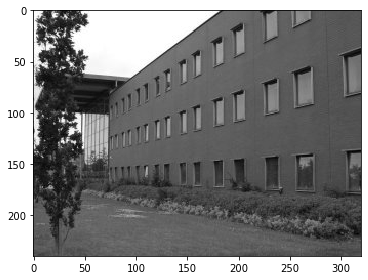

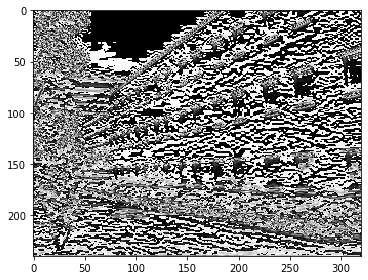

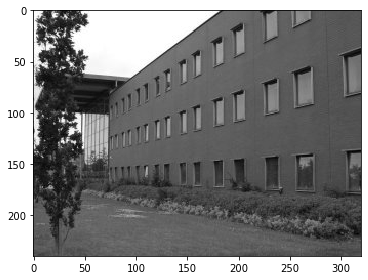

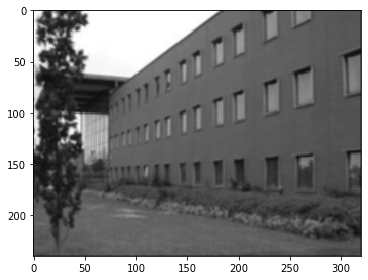

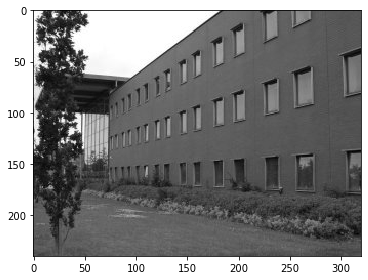

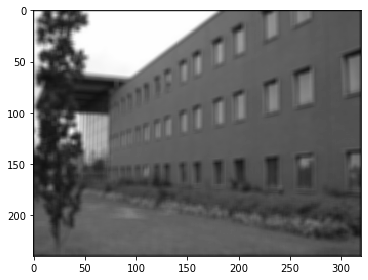

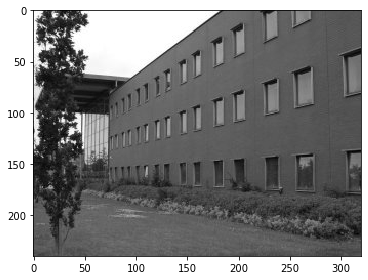

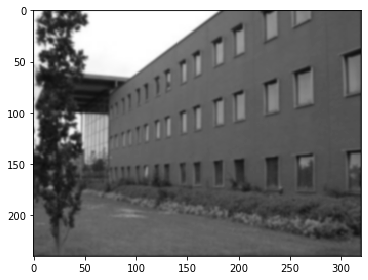

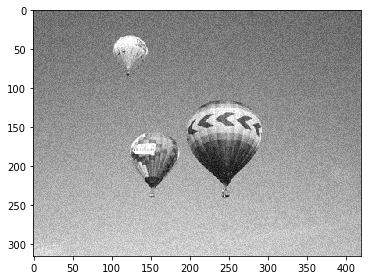

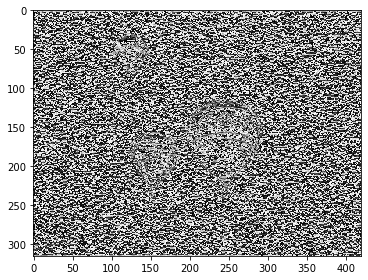

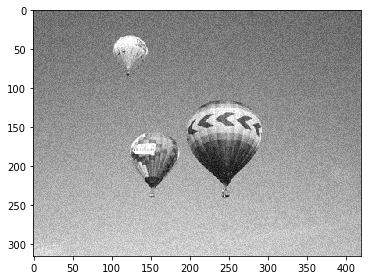

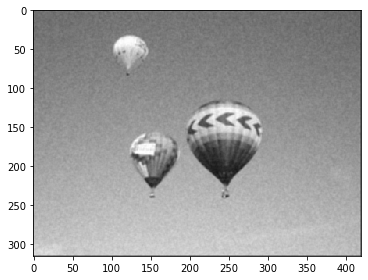

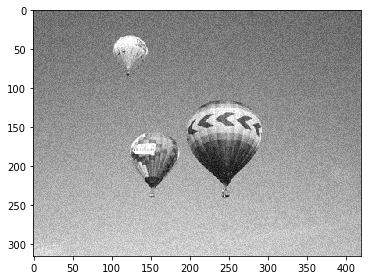

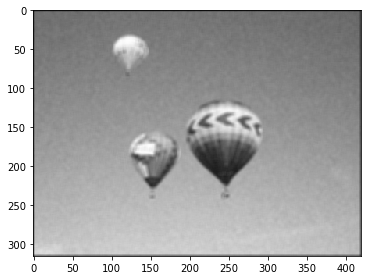

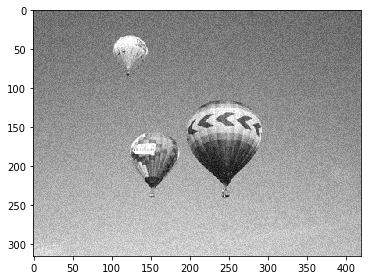

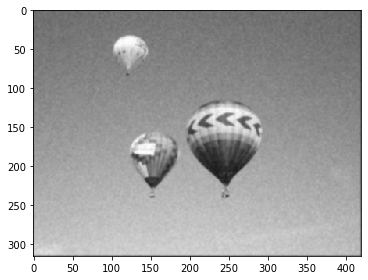

In [61]:
img_urls = ['https://www.dropbox.com/s/updljye8v80pipg/building.jpg?dl=1', 'https://www.dropbox.com/s/lcoqk6btwll8dbg/noisy.jpg?dl=1']

kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

avg_3x3_kernel = np.ones((3,3)) / 9
avg_5x5_kernel = np.ones((5,5)) / 25 
gaussian_kernel = create_gaussian_kernel(sigma=1)

kernels = [kernel, avg_3x3_kernel, avg_5x5_kernel, gaussian_kernel]

for img_url in img_urls:
    img = read_image(img_url)

    for k in kernels:
        improved_img = convolution(img, k)

        io.imshow(img)
        io.show()
        io.imshow(improved_img)
        io.show()